This notebook uses a given drone cruise velocity and the starting and end points to simulate various winds and how the drone will perform in these cases. The best flight path is chosen based on the heading which takes the least amount of time to reach the destination.

Background: In cruise, the velocity of the drone will be constant. Drag is proportional to velocity^2, and the thrust required from the motors will be equal to the drag force. It is important to note that the velocity in the drag equation refers to the velocity of the air relative to the drone, and so winds can affect the drag on a drone even if the drone is flying with the same thrust. We can neglect the effects of wind on individual propellers' thrust and drag forces because as long as the airspeed relative to the drone is the same as the no wind scenario, the drone will behave similarly. Hence this notebook simply computes the groundspeed for a given wind scenario, along with optimizing the trajectory for that wind scenario. We also assume the wind is constant in magnitude and direction throughout the flight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class vector:   
    def components(self,x,y): # x, y component of vector relative to north and east coordinate from origin
        self.p2 = [x,y]
        self.p1 = [0,0]
        self.mag = np.hypot(x,y)
        self.head = np.arctan2(y,x) # heading in radians relative to north east coordinate
    def polar(self,mag,head):
        self.mag = mag
        self.head = head
        self.p2 = [mag*np.cos(head),mag*np.sin(head)]
        self.p1 = [0,0]
    def points(self,p1,p2):
        self.p1 = p1
        self.p2 = p2
        self.mag = np.hypot(*[x2-x1 for x1,x2 in zip(p1,p2)])
        self.head = np.arctan2((p2[1]-p1[1]),(p2[0]-p1[0]))

In [3]:
# sample mission
pointA = [0,0]
pointB = [3.4e3,0]

# this is the zero-wind path for the drone
r = vector()
r.points(pointA,pointB)

# velocity vector for zero-wind path
drone_avgV = 20 # m/s in 0 wind
drone_directV = vector()
drone_directV.polar(drone_avgV,r.head)

wind_speed_percent = np.linspace(0,0.3,10)
wind_drone_headings = []
winds_test = np.linspace(0,359,360)
wind_direction = np.deg2rad(winds_test) 

# this is the range of headings that will be used for flight paths, relative to zero-wind heading
path_angles_range = np.deg2rad(45) 
delta_angles = np.linspace(-path_angles_range,path_angles_range,1000) 

# this angle corresponds to the heading angles relative to east vector
path_angles = delta_angles + drone_directV.head
min_times = []
for wind_percent in wind_speed_percent:
    # wind vector, based on % of drone speed and heading
    wind_speed = drone_avgV*wind_percent
    wind = vector()
    wind.polar(wind_speed,wind_direction)

    best_headings = []
    min_etas = []
    for wind_heading in wind.head:
        # these are the computed times to travel the required distance
        etas = (r.mag/np.cos(delta_angles))/(drone_directV.mag+wind.mag*np.cos(path_angles - wind_heading))
        best_headings.append(path_angles[etas.argmin()])
        min_etas.append(min(etas))
    min_times.append(np.array(min_etas))
    wind_drone_headings.append(np.array(best_headings))

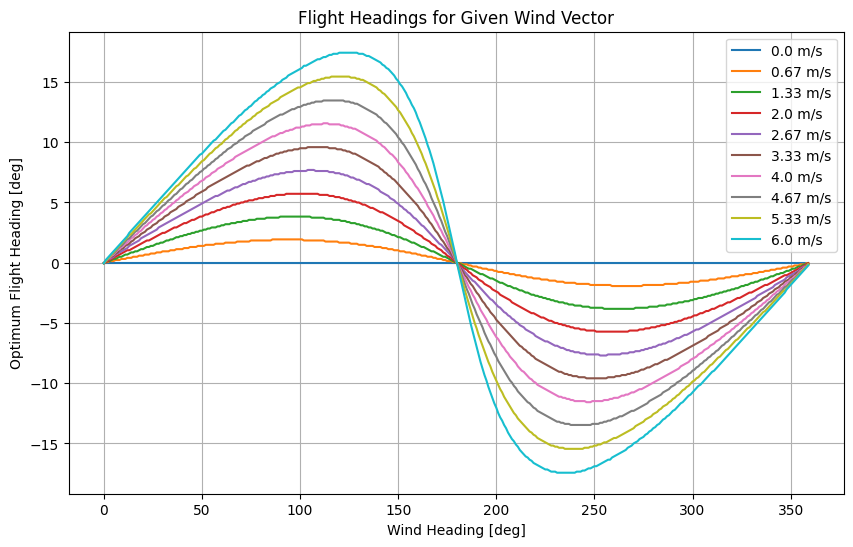

In [4]:
plt.figure(figsize=(10,6))
for i,windspeed in enumerate(wind_speed_percent):
    plt.plot(winds_test,np.rad2deg(wind_drone_headings[i]),label=str(round(windspeed*drone_avgV,2))+" m/s")
plt.xlabel("Wind Heading [deg]")
plt.ylabel("Optimum Flight Heading [deg]")
plt.legend()
plt.title("Flight Headings for Given Wind Vector")
plt.grid();

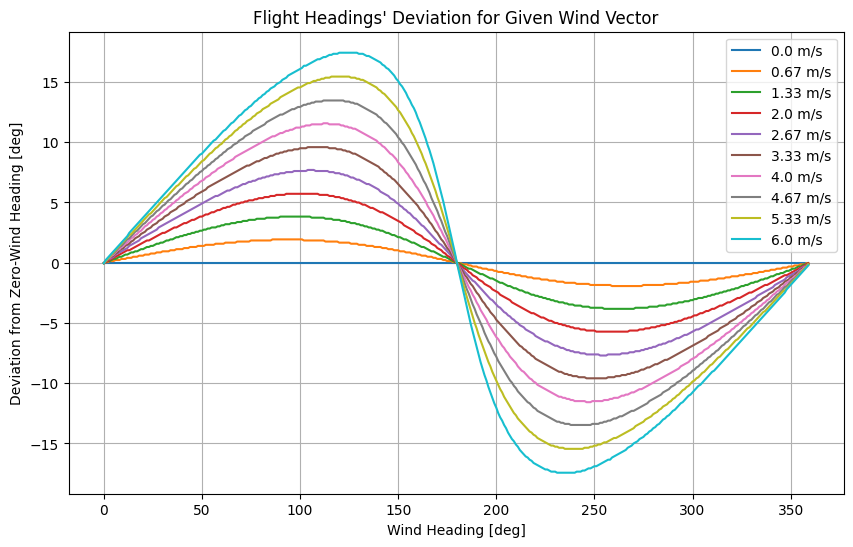

In [5]:
plt.figure(figsize=(10,6))
for i,windspeed in enumerate(wind_speed_percent):
    plt.plot(winds_test,np.rad2deg(wind_drone_headings[i]-drone_directV.head),label=str(round(windspeed*drone_avgV,2))+" m/s")
plt.xlabel("Wind Heading [deg]")
plt.ylabel("Deviation from Zero-Wind Heading [deg]")
plt.title("Flight Headings' Deviation for Given Wind Vector")
plt.legend()
plt.grid();

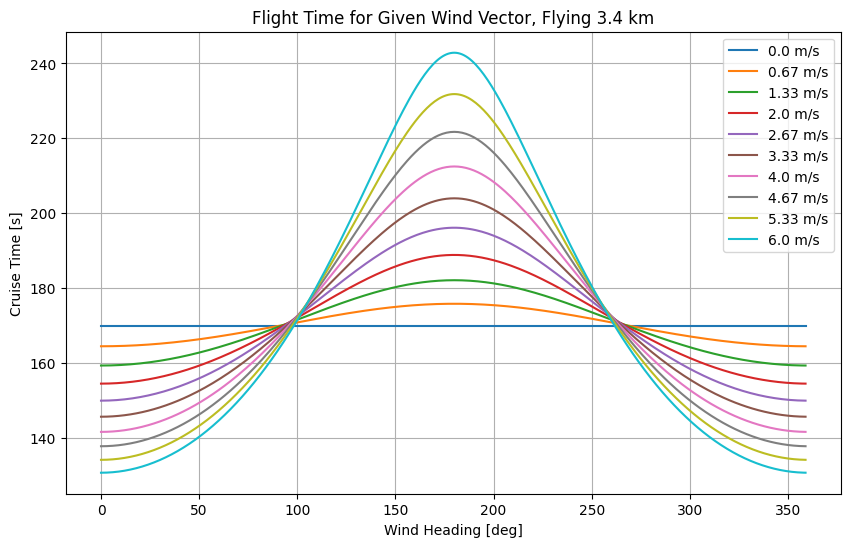

In [6]:
plt.figure(figsize=(10,6))
for i,(wind_eta,windspeed) in enumerate(zip(min_times,wind_speed_percent)):
    plt.plot(winds_test,wind_eta,label=str(round(windspeed*drone_avgV,2))+" m/s")
plt.xlabel("Wind Heading [deg]")
plt.ylabel("Cruise Time [s]")
plt.title("Flight Time for Given Wind Vector, Flying "+str(round(r.mag/1e3,2))+" km")
plt.legend()
plt.grid();

In [26]:
rx = 3.4e3
ry= 0
vx = 20*rx/np.hypot(rx,ry)
vy = 20*ry/np.hypot(rx,ry)

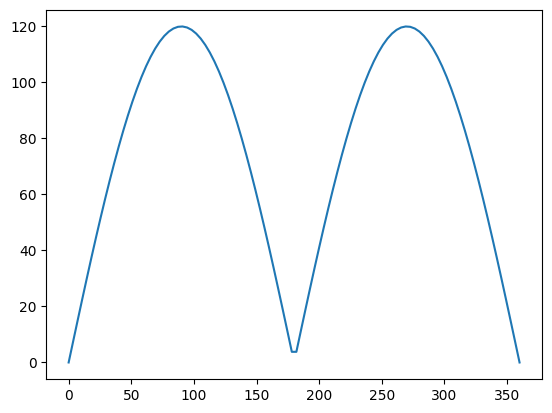

In [32]:
wmag = 6
theta = np.linspace(0,2*np.pi,100)
cp = np.hypot(vx,vy)*wmag*np.sin(theta)
plt.plot(np.rad2deg(theta),np.abs(cp))

In [54]:
wx = 0
wy = -6

In [55]:
np.rad2deg(np.arccos(np.dot([rx,ry],[wx,wy])/(np.hypot(rx,ry)*np.hypot(wx,wy))))

90.0

In [56]:
w = (wx,wy)
r = (rx,ry)

In [64]:
np.rad2deg(np.arccos(np.dot(r,w)/np.hypot(*r)/np.hypot(*w)))

90.0